In [1]:
import pandas as pd
import scanpy as sc
bone_atlas= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/bone_atlas_best_embedding_with_all_genes_log_normalised_Refined_V2.h5ad') 
adata_haem= sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_haem_compartment/bone_haem_atlas_FINAL_OBJECT_V3_FULL_GENES_for_figs.h5ad')

In [1]:
import scanpy as sc

/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_mtx from `anndata` is deprecated. Import anndata.io.read_mtx instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/env/lib/python3.10/site-package

In [8]:
# indices of haem cells you want to keep
haem_idx = set(adata_haem.obs.index)

# boolean mask for rows to keep
keep_mask = (
    ~bone_atlas.obs['major_celltype_manual'].isin(["Hematopoietic", "Erythroid"])
) | (
    bone_atlas.obs.index.isin(haem_idx)
)

# subset bone_atlas
bone_atlas_filtered = bone_atlas[keep_mask]


In [12]:
198869-200898

-2029

In [10]:
endo= sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_atlas_anndatas_non_immune/bone_endothelial_integrated_full_genes_no_immune.h5ad')

In [2]:
bone_atlas_filtered2= sc.read_h5ad('/lustre/scratch124/cellgen/haniffa/users/sm54/data/Bone_Atlas/bone_atlas_best_embedding_with_all_genes_log_normalised_Refined_V3.h5ad') 


In [13]:
endo_idx = set(endo.obs.index)

keep_mask = (
    bone_atlas_filtered.obs['major_celltype_manual'] != "Endothelial"
) | (
    bone_atlas_filtered.obs.index.isin(endo_idx)
)

bone_atlas_filtered2 = bone_atlas_filtered[keep_mask]


In [3]:
bone_atlas_filtered2

AnnData object with n_obs × n_vars = 1248482 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels_unfiltered', 'over_clustering_unfiltered', 'majority_voting_unfiltered', 'predicted_labels_Level1_unfiltered', 'predicted_labels_Level2_unfiltered', 'majority_voting_Level1_unfiltered', 'majority_voting_Level2_unfiltered', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'pre

/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


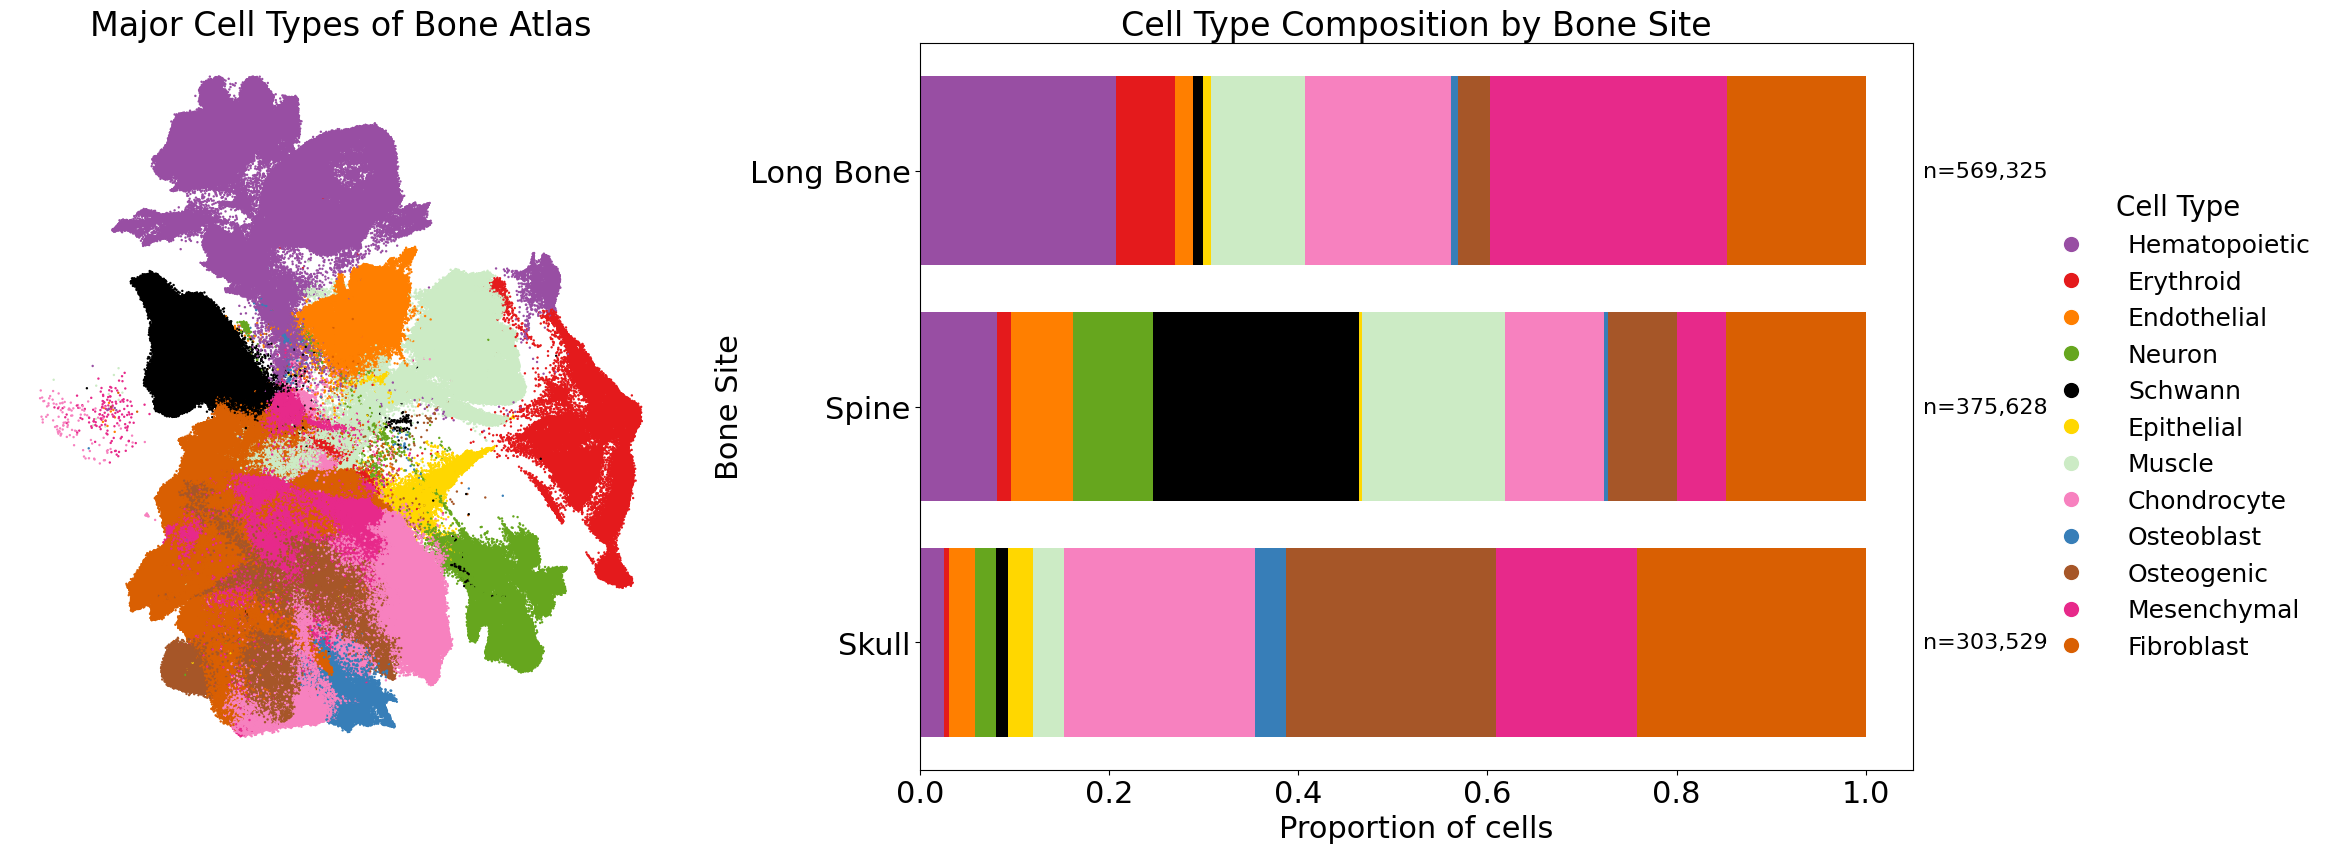

✅ Saved UMAP + Barplot using custom celltype order and major_palette.


In [4]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({"font.size": 22})

# ─────────────────────────────────────────────────────────────
# 1️⃣  Define color palette and cell-type order
# ─────────────────────────────────────────────────────────────
major_palette = {
    'Hematopoietic': '#984ea3',   # purple
    'Erythroid': '#e41a1c',       # red
    'Endothelial': '#ff7f00',     # orange
    'Neuron': '#66a61e',          # leaf green
    'Schwann': '#000000',         # teal green
    'Epithelial': '#FFD700',      # indigo
    'Muscle': '#CCEBC5',          # mint
    'Chondrocyte': '#f781bf',     # pink
    'Osteoblast': '#377eb8',      # blue
    'Osteogenic': '#a65628',      # brown
    'Mesenchymal': '#e7298a',     # magenta
    'Fibroblast': '#d95f02',      # burnt orange
}

celltype_order = [
    "Hematopoietic",
    "Erythroid",
    "Endothelial",
    "Neuron",
    "Schwann",
    "Epithelial",
    "Muscle",
    "Chondrocyte",
    "Osteoblast",
    "Osteogenic",
    "Mesenchymal",
    "Fibroblast",
]

# Ensure consistent categorical order
bone_atlas_filtered2.obs["major_celltype_manual"] = pd.Categorical(
    bone_atlas_filtered2.obs["major_celltype_manual"],
    categories=celltype_order,
    ordered=True
)

celltype_col = "major_celltype_manual"
site_col     = "Major_Bone_Sites"

# ─────────────────────────────────────────────────────────────
# 2️⃣  Cross-tabulation
# ─────────────────────────────────────────────────────────────
counts = pd.crosstab(bone_atlas_filtered2.obs[site_col], bone_atlas_filtered2.obs[celltype_col])
props  = counts.div(counts.sum(axis=1), axis=0)

# Custom bone-site order (subset to those present)
site_order = [ "Skull", "Spine","Long Bone"]
site_order = [s for s in site_order if s in props.index]

# ─────────────────────────────────────────────────────────────
# 3️⃣  Create combined figure
# ─────────────────────────────────────────────────────────────
fig = plt.figure(figsize=(22, 9))
gs = fig.add_gridspec(1, 2, width_ratios=[.4, .6])

# ============================================================
# Left panel — UMAP
# ============================================================
ax_umap = fig.add_subplot(gs[0])
sc.pl.umap(
    bone_atlas_filtered2,
    color=celltype_col,
    palette=major_palette,
    size=12,
    frameon=False,
    ax=ax_umap,
    legend_loc=None,   # we'll add a shared legend
    show=False,
)
ax_umap.set_title("Major Cell Types of Bone Atlas", fontsize=24)

# ============================================================
# Right panel — Horizontal stacked barplot
# ============================================================
ax_bar = fig.add_subplot(gs[1])
bottom = np.zeros(len(site_order))

for ct in celltype_order:
    if ct in props.columns:
        vals = props.loc[site_order, ct].values
        color = major_palette.get(ct, "#cccccc")
        ax_bar.barh(site_order, vals, left=bottom, color=color, edgecolor="none")
        bottom += vals

ax_bar.grid(False)
ax_bar.set_xlim(0, 1.05)
ax_bar.set_xlabel("Proportion of cells", fontsize=22)
ax_bar.set_ylabel("Bone Site", fontsize=22)
ax_bar.set_title("Cell Type Composition by Bone Site", fontsize=24)

# Add total n per site
totals = counts.sum(axis=1)
for i, site in enumerate(site_order):
    if site in totals.index:
        ax_bar.text(
            1.01, i, f"n={totals.loc[site]:,}",
            va="center", fontsize=16, transform=ax_bar.get_yaxis_transform()
        )

# ============================================================
# Shared legend (right side)
# ============================================================
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=major_palette[ct], markersize=12)
    for ct in celltype_order if ct in props.columns
]
labels = [ct for ct in celltype_order if ct in props.columns]

fig.legend(
    handles, labels, title="Cell Type",
    bbox_to_anchor=(0.93, 0.5), loc="center left",
    fontsize=18, title_fontsize=20,
    frameon=False, ncol=1, handletextpad=1.3
)

# ============================================================
# Save outputs
# ============================================================
plt.tight_layout()
plt.subplots_adjust(right=0.88, wspace=0.3)
fig.savefig("UMAP_Barplot_SideBySide_ordered.png", dpi=600, bbox_inches="tight")
fig.savefig("UMAP_Barplot_SideBySide_ordered.pdf", dpi=600, bbox_inches="tight")
plt.show()

print("✅ Saved UMAP + Barplot using custom celltype order and major_palette.")


In [17]:
# Define a custom palette for bone sites
bone_colors = {
    "Long Bone": "#d95f02",   # warm bone/orange-brown
    "Skull": "#7570b3",       # muted purple-gray
    "Spine": "#1b9e77"        # teal-green
}

# Assign to .uns (order must match categories)
bone_atlas_filtered2.uns["Major_Bone_Sites_colors"] = [bone_colors[cat] for cat in bone_atlas_filtered2.obs["Major_Bone_Sites"].cat.categories]


/tmp/ipykernel_3693421/611721114.py:9: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  bone_atlas_filtered2.uns["Major_Bone_Sites_colors"] = [bone_colors[cat] for cat in bone_atlas_filtered2.obs["Major_Bone_Sites"].cat.categories]


In [21]:
bone_atlas_filtered2.obs['Technology'].value_counts()

Technology
10X_scRNA-seq    774487
10X_multiome     473995
Name: count, dtype: int64

In [22]:
 #Pick strong contrasting colors
tech_colors = {
    "10X_multiome": "#1f78b4",   # deep blue
    "10X_scRNA-seq": "#e31a1c"   # strong red
}

# Assign to .uns
bone_atlas_filtered2.uns["Technology_colors"] = [tech_colors[cat] for cat in bone_atlas_filtered2.obs["Technology"].cat.categories]

In [26]:
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.lines import Line2D

# ---- GLOBAL SETTINGS ----
plt.rcParams.update({
    "font.size": 9,          # smaller base font
    "pdf.fonttype": 42,      # editable text in Illustrator
    "ps.fonttype": 42
})

# A4-friendly size (portrait, slightly smaller than full A4)
fig, axes = plt.subplots(2, 2, figsize=(7.5, 6.5))

# ---- PLOTS ----
sc.pl.umap(
    bone_atlas_filtered2,
    color="Major_Bone_Sites",
    size=1.5,
    legend_loc=None,     # MUCH lighter than right margin
    frameon=False,
    title="",
    palette=bone_colors,
    ax=axes[1, 0],
    show=False
)

sc.pl.umap(
    bone_atlas_filtered2,
    color="Age_numeric",
    size=1.5,
    legend_loc=None,          # remove legend (add colorbar later if needed)
    frameon=False,
    title="",
    ax=axes[1, 1],
    show=False
)

sc.pl.embedding(
    bone_atlas_filtered2,
    basis="X_unintegrated_pca_embedding",
    color="Technology",
    size=1.2,
    legend_loc=None,
    frameon=False,
    title="",
    palette=tech_colors,
    ax=axes[0, 0],
    show=False
)

sc.pl.umap(
    bone_atlas_filtered2,
    color="Technology",
    size=1.5,
    legend_loc=None,
    palette=tech_colors,
    frameon=False,
    title="",
    ax=axes[0, 1],
    show=False
)

# ---- LEGEND TUNING ----
for ax in axes.flat:
    leg = ax.get_legend()
    if leg is not None:
        for h in leg.legend_handles:
            if isinstance(h, PathCollection):
                h.set_sizes([80])        # much smaller
            elif isinstance(h, Line2D):
                h.set_markersize(6)
        plt.setp(leg.get_texts(), fontsize=8)

# ---- FINAL LAYOUT ----
plt.tight_layout(pad=0.8)

plt.savefig(
    "umap_grid_A4.png",
    bbox_inches="tight",
    transparent=True
)
plt.close()


In [ ]:
sc.settings.set_figure_params(figsize=(8, 8), dpi=100)  # adjust as needed


In [7]:
marker_dictionary2 = {
  "Haematopeotic":       ["PTPRC","LYZ", "CD14", "HLA-DRA", "FCGR3A", "MPO","IL7R", "MS4A1", "CD19"],
        "Erythroid":          ["GYPA", "HBZ"],
      "Endothelial":        ["PECAM1", "KDR", "CDH5", "PLVAP", "CLDN5"],
    "Neuron":             ["TUBB3", "ELAVL3", "DCX"],
 "Schwann":             [ "SOX10", "MPZ"],

     #"Epithelial/Epidermis":      [ "KRT19", 'KRT14', 'KRT15', 'KRT17'],
    "Epithelial":         ["EPCAM", "CDH1", "KRT8", "KRT18"],
     "Muscle":             [ "MYOD1", "DES","ACTA1","PAX7", "MYF5", "TNNT3"],

  #"Epidermis":          ["KRT5", "KRT14", "KRT15", "PMEL", "TYR"],
    #"Neuroepithelial": ["HES5", "HES6", "NNAT", "UCHL1", "KRT8", "KRT18", "FABP5"],
      "Chondrocyte":        ["SOX9", "COL2A1", "ACAN", "HAPLN1", "COL9A1"],
       "Osteoblast":         ["BGLAP",'SPP1', 'SP7', "RUNX2",'SATB2'],
      "Mesenchymal":  ["MEIS1","MEIS2", "PRRX1","THBS2"],
      "Fibroblast":         ["PDGFRA", "DCN", "LUM", "TWIST2"],
 

}

In [8]:
plt.rcParams.update({
    "font.size": 12,
    "pdf.fonttype": 42,   # editable text in Illustrator
    "ps.fonttype": 42
})


In [9]:

# ─────────────────────────────────────────────────────────────
# 1️⃣  Define color palette and cell-type order
# ─────────────────────────────────────────────────────────────
major_palette = {
    'Hematopoietic': '#984ea3',   # purple
    'Erythroid': '#e41a1c',       # red
    'Endothelial': '#ff7f00',     # orange
    'Neuron': '#66a61e',          # leaf green
    'Schwann': '#000000',         # teal green
    'Epithelial': '#FFD700',      # indigo
    'Muscle': '#CCEBC5',          # mint
    'Chondrocyte': '#f781bf',     # pink
    'Osteoblast': '#377eb8',      # blue
    'Osteogenic': '#a65628',      # brown
    'Mesenchymal': '#e7298a',     # magenta
    'Fibroblast': '#d95f02',      # burnt orange
}

celltype_order = [
    "Hematopoietic",
    "Erythroid",
    "Endothelial",
    "Neuron",
    "Schwann",
    "Epithelial",
    "Muscle",
    "Chondrocyte",
    "Osteoblast",
    "Osteogenic",
    "Mesenchymal",
    "Fibroblast",
]

# Ensure consistent categorical order
bone_atlas_filtered2.obs["major_celltype_manual"] = pd.Categorical(
    bone_atlas_filtered2.obs["major_celltype_manual"],
    categories=celltype_order,
    ordered=True
)

celltype_col = "major_celltype_manual"
site_col     = "Major_Bone_Sites"



fig_umap, ax_umap = plt.subplots(figsize=(3.5, 3.5))
celltype_col = "major_celltype_manual"
site_col     = "Major_Bone_Sites"


sc.pl.umap(
    bone_atlas_filtered2,
    color=celltype_col,
    palette=major_palette,
    size=4,
    frameon=False,
    legend_loc=None,   # explicitly remove legend
    ax=ax_umap,
    show=False,
)

ax_umap.set_title("Major Cell Types", fontsize=12)

plt.tight_layout(pad=0.3)

fig_umap.savefig(
    "UMAP_major_celltypes_A4slot.pdf",
    bbox_inches="tight"
)
fig_umap.savefig(
    "UMAP_major_celltypes_A4slot.png",
    dpi=600,
    bbox_inches="tight"
)

plt.close(fig_umap)


/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [71]:
import numpy as np
fig_bar, ax_bar = plt.subplots(figsize=(6.2, 3.5))
# ─────────────────────────────────────────────────────────────
# 2️⃣  Cross-tabulation
# ─────────────────────────────────────────────────────────────
counts = pd.crosstab(bone_atlas_filtered2.obs[site_col], bone_atlas_filtered2.obs[celltype_col])
props  = counts.div(counts.sum(axis=1), axis=0)

# Custom bone-site order (subset to those present)
site_order = [ "Skull", "Spine","Long Bone"]
site_order = [s for s in site_order if s in props.index]

# ─────────────────────────────────────────────────────────────
# 3️⃣  Create combined figure
# ─────────────────────────────────────────────────────────────

# Custom bone-site order (subset to those present)
site_order = [ "Skull", "Spine","Long Bone"]
site_order = [s for s in site_order if s in props.index]


bottom = np.zeros(len(site_order))

for ct in celltype_order:
    if ct in props.columns:
        vals = props.loc[site_order, ct].values
        ax_bar.barh(
            site_order,
            vals,
            left=bottom,
            color=major_palette.get(ct, "#cccccc"),
            edgecolor="none"
        )
        bottom += vals

ax_bar.set_xlim(0, 1.05)
ax_bar.set_xlabel("Proportion of cells", fontsize=12)
ax_bar.set_ylabel("Bone Site", fontsize=12)
ax_bar.set_title("Cell Type Composition by Bone Site", fontsize=12)

ax_bar.grid(False)

# Add total n per site
totals = counts.sum(axis=1)
for i, site in enumerate(site_order):
    ax_bar.text(
        1.01, i,
        f"n={totals.loc[site]:,}",
        va="center",
        fontsize=10,
        transform=ax_bar.get_yaxis_transform()
    )

plt.tight_layout(pad=0.3)

fig_bar.savefig(
    "Barplot_celltype_composition_A4slot.pdf",
    bbox_inches="tight"
)
fig_bar.savefig(
    "Barplot_celltype_composition_A4slot.png",
    dpi=600,
    bbox_inches="tight"
)

plt.close(fig_bar)


In [73]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.size": 12,
    "pdf.fonttype": 42,
    "ps.fonttype": 42
})

# Create legend figure (A4 slot)
fig_leg, ax_leg = plt.subplots(figsize=(2.2, 3.5))
ax_leg.axis("off")

handles = [
    plt.Line2D(
        [0], [0],
        marker='o',
        linestyle='',
        markerfacecolor=major_palette[ct],
        markeredgecolor='none',
        markersize=8
    )
    for ct in celltype_order
    if ct in bone_atlas_filtered2.obs[celltype_col].cat.categories
]

labels = [
    ct for ct in celltype_order
    if ct in bone_atlas_filtered2.obs[celltype_col].cat.categories
]

ax_leg.legend(
    handles,
    labels,
    title="Cell type",
    loc="center left",
    frameon=False,
    fontsize=12,
    title_fontsize=12,
    handletextpad=0.8,
    labelspacing=0.6
)

plt.tight_layout(pad=0.2)

fig_leg.savefig(
    "Legend_major_celltypes_A4slot.pdf",
    bbox_inches="tight"
)
fig_leg.savefig(
    "Legend_major_celltypes_A4slot.png",
    dpi=600,
    bbox_inches="tight"
)

plt.close(fig_leg)


/env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/tmp/ipykernel_71730/885746999.py:81: UserWarning: This figure includes A

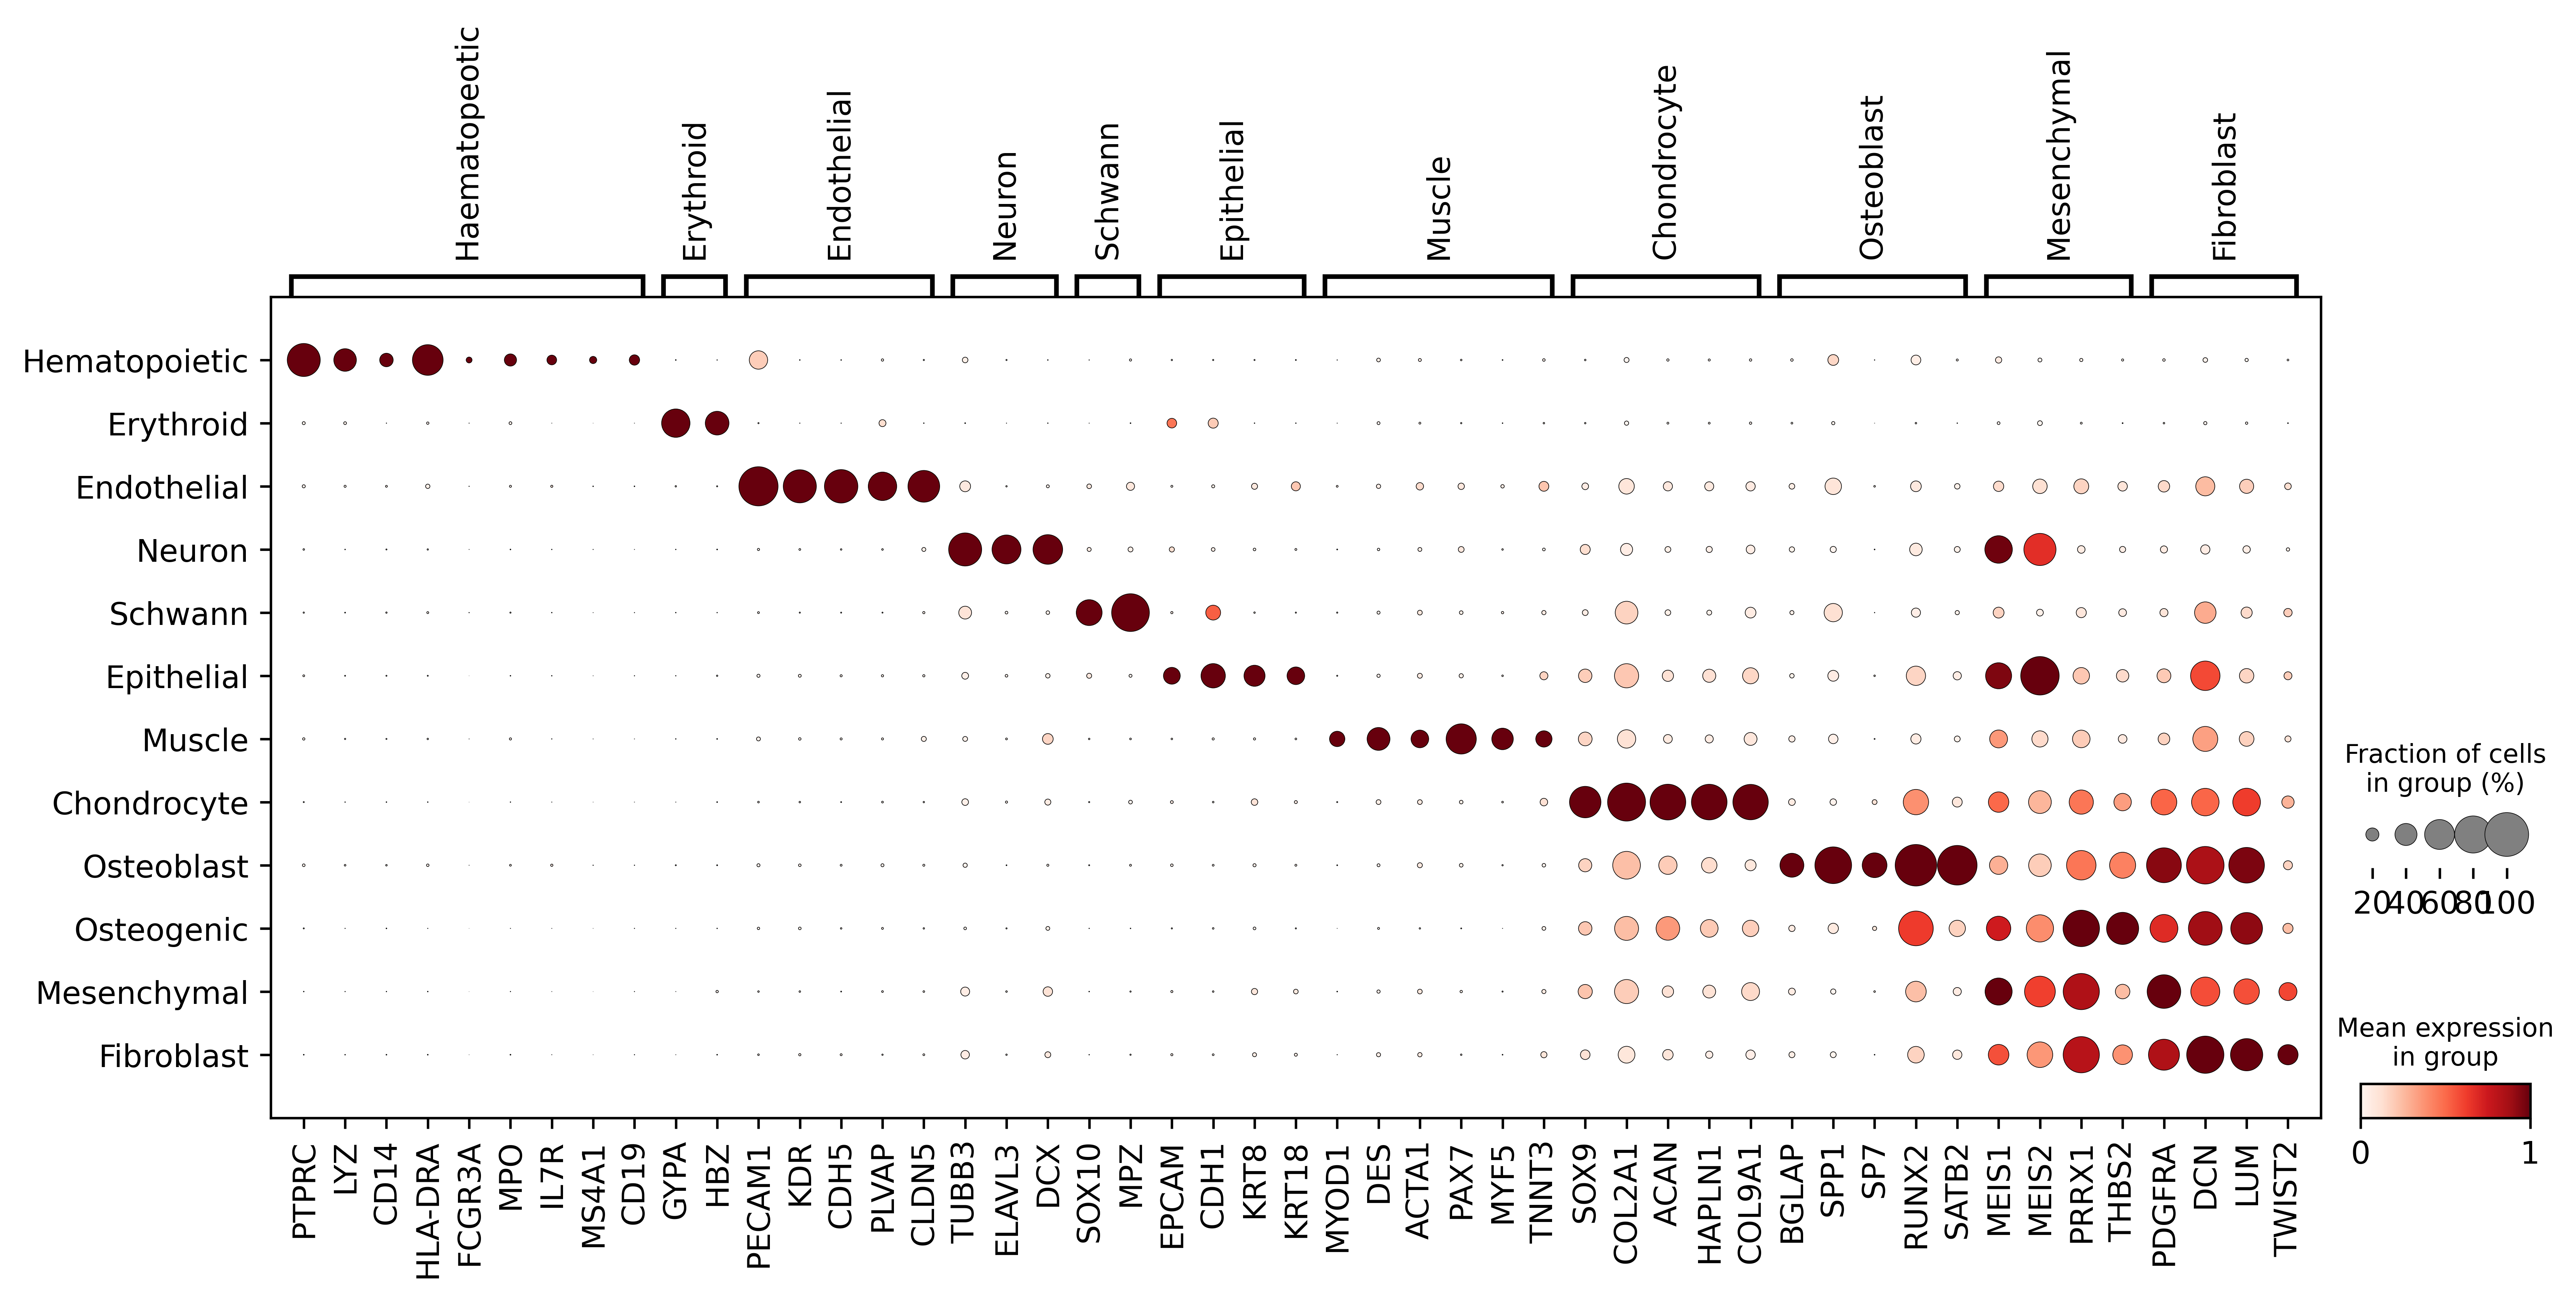

✅ Clean A4-width dotplot saved (Scanpy-stable, no legend hacking).


In [10]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------------------------
# Global print-safe settings
# -------------------------------------------------
# plt.rcParams.update({
#     "font.size": 10,
#     "pdf.fonttype": 42,
#     "ps.fonttype": 42
# })
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 7,
    "pdf.fonttype": 42,   # keep text editable in Illustrator
    "ps.fonttype": 42
})


sc.set_figure_params(dpi=300, fontsize=10)

# -------------------------------------------------
# Enforce cell-type order
# -------------------------------------------------
celltype_order = [
    "Hematopoietic",
    "Erythroid",
    "Endothelial",
    "Neuron",
    "Schwann",
    "Epithelial",
    "Muscle",
    "Chondrocyte",
    "Osteoblast",
    "Osteogenic",
    "Mesenchymal",
    "Fibroblast",
]

bone_atlas_filtered2.obs["major_celltype_manual"] = pd.Categorical(
    bone_atlas_filtered2.obs["major_celltype_manual"],
    categories=celltype_order,
    ordered=True
)

# -------------------------------------------------
# Dotplot
# -------------------------------------------------
dp = sc.pl.dotplot(
    bone_atlas_filtered2,
    var_names=marker_dictionary2,
    groupby="major_celltype_manual",
    categories_order=celltype_order,
    standard_scale="var",
    #dot_max=1.0,
    color_map="Reds",
    dendrogram=False,
    show=False,
    return_fig=True
)

# -------------------------------------------------
# Resize to A4 width
# -------------------------------------------------
fig = dp.get_axes()['mainplot_ax'].figure
fig.set_size_inches(13, 6)  # A4 width, sensible height

# -------------------------------------------------
# Reduce tick-label clutter
# -------------------------------------------------
for ax in fig.axes:
    ax.tick_params(labelsize=10)

# -------------------------------------------------
# Layout + save
# -------------------------------------------------
plt.tight_layout()

fig.savefig(
    "dotplot_haem_main_celltypes_A4width_clean.pdf",
    bbox_inches="tight"
)
fig.savefig(
    "dotplot_haem_main_celltypes_A4width_clean.png",
    dpi=600,
    bbox_inches="tight"
)

plt.show()

print("✅ Clean A4-width dotplot saved (Scanpy-stable, no legend hacking).")


In [19]:
age_count_df = (
   bone_atlas_filtered2.obs.loc[bone_atlas_filtered2.obs_names]
    .groupby(["Age_string", "major_celltype_manual"])
    .size()                       # directly counts rows per group
    .reset_index(name="count")    # gives a proper column name
)
#age_count_df = anno_obs.loc[adata['rna'].obs_names].groupby(["age", "anno_lvl_2_final_clean"]).count().reset_index()

age_count_df["anno"] = age_count_df["major_celltype_manual"]

/tmp/ipykernel_71730/3922292353.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Age_string", "major_celltype_manual"])


In [20]:
# distribution by Organ
organ_count_df = (
    bone_atlas_filtered2.obs.loc[bone_atlas_filtered2.obs_names]
    .groupby(["Major_Bone_Sites", "major_celltype_manual"])
    .size()
    .reset_index(name="count")
)
organ_count_df["anno"] = organ_count_df["major_celltype_manual"]
organ_count_df["type"] = "Organ"

# distribution by Age (your existing df)
age_count_df["type"] = "Age"

# Add missing columns
age_count_df["Organ"] = "All"      # filler when summarising by Age
organ_count_df["Age_str"] = "All"  # filler when summarising by Organ

# Add the type indicator
age_count_df["type"] = "Age"
organ_count_df["type"] = "Organ"

# Concatenate

# combine
combined_df = pd.concat([age_count_df, organ_count_df], ignore_index=True)


/tmp/ipykernel_71730/2328235604.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["Major_Bone_Sites", "major_celltype_manual"])


In [21]:
combined_df

,Age_string,major_celltype_manual,count,anno,type,Organ,Major_Bone_Sites,Age_str
0,5,Hematopoietic,410,Hematopoietic,Age,All,NaN,NaN
1,5,Erythroid,1992,Erythroid,Age,All,NaN,NaN
2,5,Endothelial,848,Endothelial,Age,All,NaN,NaN
3,5,Neuron,12323,Neuron,Age,All,NaN,NaN
4,5,Schwann,1090,Schwann,Age,All,NaN,NaN
...,...,...,...,...,...,...,...,...
199,NaN,Chondrocyte,39324,Chondrocyte,Organ,NaN,Spine,All
200,NaN,Osteoblast,1526,Osteoblast,Organ,NaN,Spine,All
201,NaN,Osteogenic,27708,Osteogenic,Organ,NaN,Spine,All
202,NaN,Mesenchymal,19315,Mesenchymal,Organ,NaN,Spine,All


In [13]:
df_ncells['Age_string']=df_ncells['Age_string'].astype(int)

In [14]:
## r2py setup
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()

/tmp/ipykernel_71730/1862553592.py:7: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [15]:
%load_ext rpy2.ipython


In [16]:
%%R
library(tidyverse)
library(reshape2)
library(patchwork)

remove_x_axis <- function(){
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank(), axis.title.x = element_blank())  
}

remove_y_axis <- function(){
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.title.y = element_blank())  
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [23]:
figdir = "/nfs/team298/sm54/BoneAtlasProject/src/final_version_bone_haem/figures/"


In [25]:
%%R -i combined_df -i figdir

library(ggplot2)
library(dplyr)
library(cowplot)

# -----------------------
# Custom Organ palette
# -----------------------
organ_colors <- c(
  "Long Bone" = "#D95F02",
  "Skull"     = "#7570B3",
  "Spine"     = "#1B9E77"
)

# -----------------------
# Desired cell type order (TOP → BOTTOM)
# -----------------------
celltype_order <- c(
     "Hematopoietic",
    "Erythroid",
    "Endothelial",
    "Neuron",
    "Schwann",
    "Epithelial",
    "Muscle",
    "Chondrocyte",
    "Osteoblast",
    "Osteogenic",
    "Mesenchymal",
    "Fibroblast"
)

# -----------------------
# Prep
# -----------------------
plot_df <- combined_df %>%
  filter(!is.na(anno)) %>%
  mutate(
    anno = factor(anno, levels = rev(celltype_order)),  # reversed for coord_flip
    Age_numeric = as.numeric(gsub("[^0-9.]", "", Age_string))
  )

# Labels for Age panel only
text_df <- plot_df %>%
  filter(type == "Age", Age_string != "All") %>%
  group_by(anno) %>%
  summarise(N_cells = sum(count), .groups = "drop")

# -----------------------
# Age plot (continuous gradient)
# -----------------------
pl_age <- ggplot(
    arrange(
      subset(plot_df, type == "Age" & Age_string != "All"),
      anno, Age_numeric
    ),
    aes(x = anno, y = count)
  ) +
  geom_col(aes(fill = Age_numeric), position = "fill", width = 0.8) +
  coord_flip(clip = "off") +
  scale_fill_gradientn(
    colours = c("#440154FF", "#3B528BFF", "#21908CFF",
                "#5DC863FF", "#FDE725FF"),
    limits = c(min(plot_df$Age_numeric, na.rm = TRUE),
               max(plot_df$Age_numeric, na.rm = TRUE)),
    name = "Age (pcw)"
  ) +
  xlab("Cell types") +
  theme_bw(base_size = 22) +
  theme(
    legend.position = "left",
    axis.text.y     = element_text(size = 22),
    axis.text.x     = element_text(size = 22),
    legend.text     = element_text(size = 22),
    legend.title    = element_text(size = 22, face = "bold"),
    plot.margin     = margin(7, 30, 7, 7)
  ) +
  ggtitle("Distribution by Age") +
  geom_text(
    data = text_df,
    aes(x = anno, y = 0.97, label = paste0(N_cells)),
    inherit.aes = FALSE,
    hjust = -0.2,
    size = 7
  )

# -----------------------
# Organ plot (categorical palette)
# -----------------------
pl_org <- ggplot(
    subset(plot_df, type == "Organ" & Major_Bone_Sites != "All"),
    aes(x = anno, y = count)
  ) +
  geom_col(aes(fill = Major_Bone_Sites), position = "fill", width = 0.8) +
  coord_flip(clip = "off") +
  scale_fill_manual(values = organ_colors, name = "Bone site") +
  theme_bw(base_size = 22) +
  theme(
    axis.text.y   = element_blank(),   # remove duplicate labels
    axis.ticks.y  = element_blank(),
    axis.title.y  = element_blank(),
    axis.text.x   = element_text(size = 22),
    legend.text   = element_text(size = 22),
    legend.title  = element_text(size = 22, face = "bold")
  ) +
  ggtitle("Distribution by Organ")

# -----------------------
# Combine side by side
# -----------------------
combined_plot <- plot_grid(
  pl_age,
  pl_org,
  ncol = 2,
  align = "h",
  axis = "tb",
  rel_widths = c(0.8, 0.25)
)

# -----------------------
# Save
# -----------------------
ggsave(
  file.path(figdir, "distribution_Age_vs_Organ_side_by_side_BoneAtlas_6JAN.pdf"),
  combined_plot,
  height = 28,
  width = 32
)

ggsave(
  file.path(figdir, "distribution_Age_vs_Organ_side_by_side_BoneAtlas_FT_6JAN.png"),
  combined_plot,
  height = 28,
  width = 32
)


/env/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "Age_str". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '


In [33]:
%%R -i combined_df -i figdir

library(ggplot2)
library(dplyr)
library(cowplot)

# -----------------------
# A4 dimensions (inches)
# -----------------------
A4_WIDTH  <- 10.27 #8.27
A4_HEIGHT <- 11.69

# -----------------------
# Custom Organ palette
# -----------------------
organ_colors <- c(
  "Long Bone" = "#D95F02",
  "Spine"     = "#1B9E77",
  "Skull"     = "#7570B3"
)

# -----------------------
# Desired cell type order (TOP → BOTTOM)
# -----------------------
celltype_order <- c(
  "Hematopoietic",
  "Erythroid",
  "Endothelial",
  "Neuron",
  "Schwann",
  "Epithelial",
  "Muscle",
  "Chondrocyte",
  "Osteoblast",
  "Osteogenic",
  "Mesenchymal",
  "Fibroblast"
)

# -----------------------
# Prep dataframe
# -----------------------
plot_df <- combined_df %>%
  filter(!is.na(anno)) %>%
  mutate(
    anno = factor(anno, levels = rev(celltype_order)),  # reversed for coord_flip
    Age_numeric = as.numeric(gsub("[^0-9.]", "", Age_string)),

    # IMPORTANT: reversed order so that AFTER coord_flip()
    # the visual order is: Long Bone | Spine | Skull
    Major_Bone_Sites = factor(
      Major_Bone_Sites,
      levels = c("Skull", "Spine", "Long Bone")
    )
  )

# -----------------------
# Labels for Age panel only
# -----------------------
text_df <- plot_df %>%
  filter(type == "Age", Age_string != "All") %>%
  group_by(anno) %>%
  summarise(N_cells = sum(count), .groups = "drop")

# -----------------------
# Age plot (40%)
# -----------------------
pl_age <- ggplot(
  arrange(
    subset(plot_df, type == "Age" & Age_string != "All"),
    anno, Age_numeric
  ),
  aes(x = anno, y = count)
) +
  geom_col(aes(fill = Age_numeric), position = "fill", width = 0.8) +
  coord_flip(clip = "off") +
  scale_fill_gradientn(
    colours = c(
      "#440154FF", "#3B528BFF", "#21908CFF",
      "#5DC863FF", "#FDE725FF"
    ),
    limits = c(
      min(plot_df$Age_numeric, na.rm = TRUE),
      max(plot_df$Age_numeric, na.rm = TRUE)
    ),
    name = "Age (pcw)"
  ) +
  ggtitle("Distribution by Age") +
  xlab("Cell types") +
  geom_text(
    data = text_df,
    aes(x = anno, y = 0.97, label = N_cells),
    inherit.aes = FALSE,
    hjust = -0.2,
    size = 3.5
  ) +
  theme_bw(base_size = 10) +
  theme(
    legend.position = "left",
    axis.text.y     = element_text(size = 10),
    axis.text.x     = element_text(size = 10),
    legend.text     = element_text(size = 10),
    legend.title    = element_text(size = 10, face = "bold"),
    plot.margin     = margin(5, 10, 5, 5)
  )

# -----------------------
# Organ plot (60%)
# -----------------------
pl_org <- ggplot(
  subset(plot_df, type == "Organ" & Major_Bone_Sites != "All"),
  aes(x = anno, y = count)
) +
  geom_col(aes(fill = Major_Bone_Sites), position = "fill", width = 0.8) +
  coord_flip(clip = "off") +
  scale_fill_manual(values = organ_colors, name = "Bone site") +
  ggtitle("Distribution by Organ") +
  theme_bw(base_size = 10) +
  theme(
    axis.text.y   = element_blank(),
    axis.ticks.y  = element_blank(),
    axis.title.y  = element_blank(),
    axis.text.x   = element_text(size = 10),
    legend.text   = element_text(size = 10),
    legend.title  = element_text(size = 10, face = "bold")
  )

# -----------------------
# Combine: 40% Age | 60% Organ
# -----------------------
combined_plot <- plot_grid(
  pl_age,
  pl_org,
  ncol = 2,
  align = "h",
  axis = "tb",
  rel_widths = c(0.5, 0.5)
)

# -----------------------
# Save (A4 width × 50% height)
# -----------------------
ggsave(
  file.path(figdir, "distribution_Age_vs_Organ_A4_halfheight.pdf"),
  combined_plot,
  width  = A4_WIDTH,
  height = A4_HEIGHT / 2,
  units  = "in"
)

ggsave(
  file.path(figdir, "distribution_Age_vs_Organ_A4_halfheight.png"),
  combined_plot,
  width  = A4_WIDTH,
  height = A4_HEIGHT / 2,
  units  = "in",
  dpi    = 300
)


/env/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "Age_str". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
